In [11]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [12]:
import celltypist
from celltypist import models

In [13]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/T_NK/all_CD8_V2/")

In [14]:
adata0 = sc.read_h5ad("./all_CD8.filtered.n10.h5ad")

In [15]:
## read data
adata = sc.read_h5ad("./all_CD8.bySample.n10.filtered.bbknn_umap_leiden_marker.res1.8.h5ad")
adata.raw = adata0.raw.to_adata()
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [16]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)
adata.obs["disease"] = pd.Categorical(select.disease)

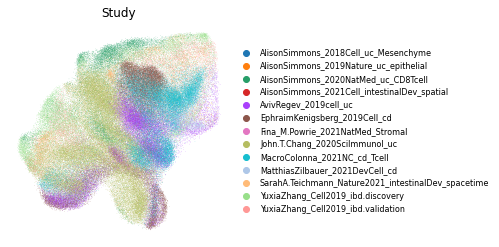

In [19]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['study'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['study'], title='Study', frameon=False, legend_fontsize = 8)

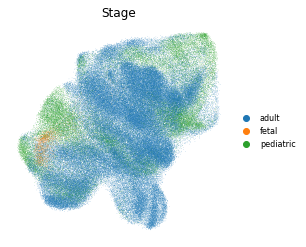

In [20]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['developmentStage'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['developmentStage'], title='Stage', frameon=False, legend_fontsize = 8)

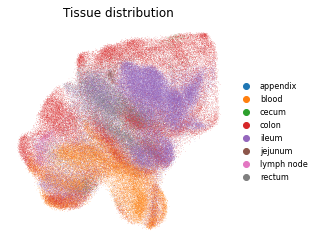

In [22]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['location2'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['location2'], title='Tissue distribution', frameon=False, legend_fontsize = 8)

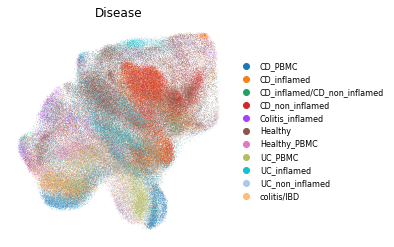

In [23]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=['disease'], legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color=['disease'], title='Disease', frameon=False, legend_fontsize = 8)

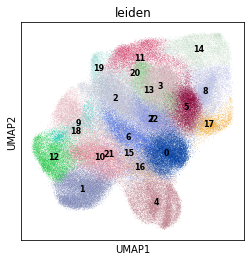

In [10]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

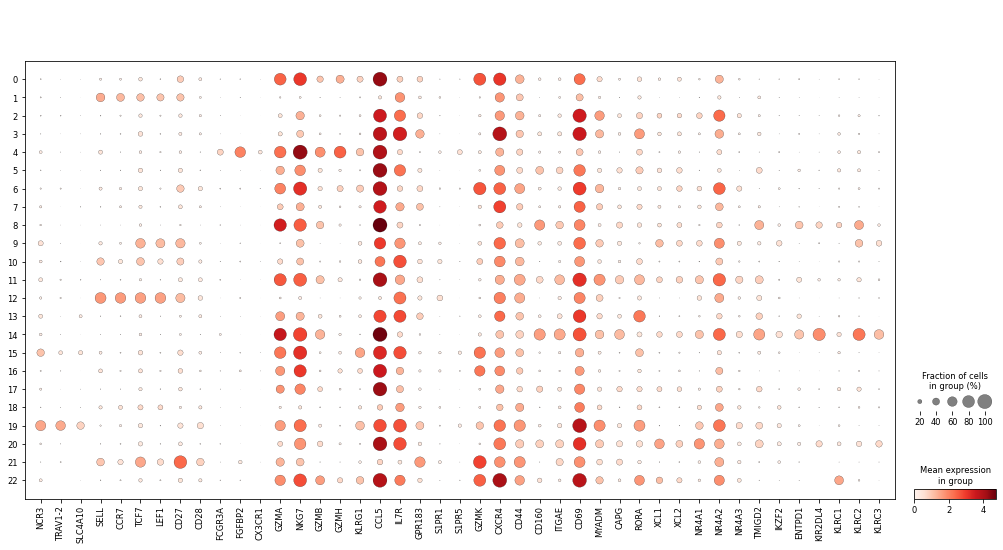

In [11]:
#sc.pl.dotplot(adata[np.logical_not(adata.obs.leiden.isin(['15','19','1','12','4','10','21','0','6','16','9','18']))],
#sc.pl.dotplot(adata[adata.obs.leiden.isin(['3','6','9','11','12','15','17','0','16','8','10'])], #
sc.pl.dotplot(adata,
    [ # "CD3D","CD3G","CD4","CD8A","CD8B",
     "NCR3","TRAV1-2","SLC4A10", ## MAIT
     "SELL","CCR7","TCF7","LEF1","CD27","CD28", # Tn
     "FCGR3A","FGFBP2","CX3CR1","GZMA","NKG7","GZMB","GZMH","KLRG1", # Teff
      "CCL5","IL7R","GPR183","S1PR1","S1PR5", ## Tcm
      "GZMK","CXCR4","CD44", # Tem
     "CD160","ITGAE","CD69","MYADM","CAPG","RORA","XCL1","XCL2","NR4A1","NR4A2","NR4A3", ## Trm
     "TMIGD2","IKZF2","ENTPD1","KIR2DL4","KLRC1","KLRC2","KLRC3", ## IEL
      ], groupby="leiden")

## MAIT => C15/C19, SLC4A10 high √
## CD8+ Naive => C1/C12, SELL/CCR7/TCF7/LEF1 high, and CCL5 low, GZMA/NKG7 low
## CD8+ Temra/Teff => C4, SELL/CCR7/TCF7/LEF1 low, FCGR3A/CX3CR1/FGFBP2 high
## CD8+ Tcm => C10/21, SELL/CCR7/TCF7/LEF1 high, CCL5 high, GZMA+, IL7R+, S1PR1+
## CD8+ Tem => C0/C6/C16/C22, SELL/CCR7/TCF7/LEF1 low, GZMK, CXCR4, CD44 high
## CD8+ activate T => C9/C18, SELL/CCR7/TCF7/LEF1 meidate, NKG7+ CD160 low, RORA low
## CD8+ IEL => C5/C8/C11/C14/C17/C20, SELL/CCR7/TCF7/LEF1 low, CD160 high
## CD8+ Trm => C2/C3/C7/C13, SELL/CCR7/TCF7/LEF1 low, CD160 low

In [12]:
adata.obs["label"] = "T_cells"

select = adata.obs[ adata.obs.leiden.isin(['1','12']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ Tn'

select = adata.obs[ adata.obs.leiden.isin(['10','21']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ Tcm'

select = adata.obs[ adata.obs.leiden.isin(['15','19']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ MAIT'

select = adata.obs[ adata.obs.leiden.isin(['4']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ Teff'

select = adata.obs[ adata.obs.leiden.isin(['0','6','16','22']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ Tem'

select = adata.obs[ adata.obs.leiden.isin(['5','8','11','14','17','20']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ IEL'

select = adata.obs[ adata.obs.leiden.isin(['2','3','7','13']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ Trm'

select = adata.obs[ adata.obs.leiden.isin(['9','18']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'CD8+ activated T'

In [13]:
newOrder = ['CD8+ Tn','CD8+ Tcm','CD8+ Tem','CD8+ IEL',"CD8+ Trm","CD8+ Teff","CD8+ activated T","CD8+ MAIT"]
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

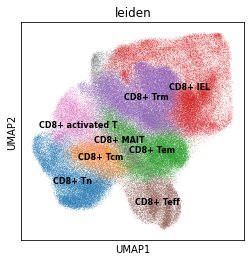

In [14]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [15]:
adata.obs["major"] = "CD8T"

In [16]:
adata = adata.raw.to_adata()

In [17]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [18]:
adata.write_h5ad("CD8T.clean.h5ad")

... storing 'major' as categorical


In [19]:
adata.write_loom("CD8T.clean.loom", write_obsm_varm=True)

In [20]:
## done